In [1]:
import pandas as pd
import random
import ast
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
df = pd.read_csv("../TCGA_mutations/TCGA_annotation.csv")

In [5]:
tumor = list(set(df['Project']))
tumorStage = list(set(df['TumorStage']))


In [6]:
d = {}
for t in tumor:
    barcode = df.loc[df['Project'] == t]['Barcode']
    d[t] =list (set(["-".join(i.split("-")[:4]) for i in barcode]))

In [7]:
df_data = pd.read_csv("microindel_list.csv")

In [10]:
df_data.shape

(720827, 6)

In [8]:
idx = list(d.keys())
idx.sort()

In [9]:
idx

['TCGA-BRCA',
 'TCGA-COAD',
 'TCGA-HNSC',
 'TCGA-KIRC',
 'TCGA-KIRP',
 'TCGA-LIHC',
 'TCGA-LUAD',
 'TCGA-READ',
 'TCGA-STAD',
 'TCGA-THCA']

In [8]:
# out = []
# for seed in range(100):
#     print(seed)
#     random.seed(seed)
#     s = d['TCGA-THCA']
#     random.shuffle(s)
#     s1, s2 = s[:int(len(s)/2)],s[int(len(s)/2):]
#     data1 = df_data.loc[df_data['SampleID'].isin(s1)]
#     data2 = df_data.loc[df_data['SampleID'].isin(s2)]
#     for g in set(data1['Symbol']):
#         num = data1.loc[data1['Symbol'] == g].shape[0]
#         out.append([seed,'A',g,num])
#     for g in set(data2['Symbol']):
#         num = data2.loc[data2['Symbol'] == g].shape[0]
#         out.append([seed,'B',g,num])

In [11]:
out_txt = ""
for cancer in idx:
    print(cancer)
    out = []
    for seed in range(100):
        #print(seed)
        random.seed(seed)
        s = d[cancer]
        random.shuffle(s)
        s1, s2 = s[:int(len(s)/2)],s[int(len(s)/2):]
        out_txt += cancer + " Round " + str(seed) + " Group A:"
        for c in s1:
            out_txt += c + ","
        out_txt += "\n" + cancer +  " Round " + str(seed) + " Group B :"
        for c in s2:
            out_txt += c + ","
        out_txt += "\n"


f = open("out_barcode.txt","w+")
f.write(out_txt)
f.close()

TCGA-BRCA
TCGA-COAD
TCGA-HNSC
TCGA-KIRC
TCGA-KIRP
TCGA-LIHC
TCGA-LUAD
TCGA-READ
TCGA-STAD
TCGA-THCA


In [12]:
for cancer in d.keys():
    print(cancer)
    out = []
    s = d[cancer]

    data = df_data.loc[df_data['SampleID'].isin(s)]
    brca_sym = list(set(data['Symbol']))
    print(len(brca_sym))

TCGA-STAD
18123
TCGA-READ
0
TCGA-THCA
5641
TCGA-KIRP
9448
TCGA-LUAD
17913
TCGA-COAD
19158
TCGA-HNSC
16135
TCGA-BRCA
17833
TCGA-KIRC
10566
TCGA-LIHC
14273


In [13]:
d_out = {}
for cancer in d.keys() - set(["TCGA-READ"]):
    print(cancer)
    out = []
    for seed in range(100):
        random.seed(seed)
        s = d[cancer]
        random.shuffle(s)
        s1, s2 = s[:int(len(s)/2)],s[int(len(s)/2):]
        data = df_data.loc[df_data['SampleID'].isin(s)]
        brca_sym = list(set(data['Symbol']))
        overlap = len(set(data.loc[data['SampleID'].isin(s1)]['Symbol'].values).intersection(data.loc[data['SampleID'].isin(s2)]['Symbol'].values))
        out.append(overlap/len(brca_sym))
    d_out[cancer] = out

TCGA-STAD
TCGA-THCA
TCGA-KIRP
TCGA-LUAD
TCGA-COAD
TCGA-HNSC
TCGA-BRCA
TCGA-KIRC
TCGA-LIHC


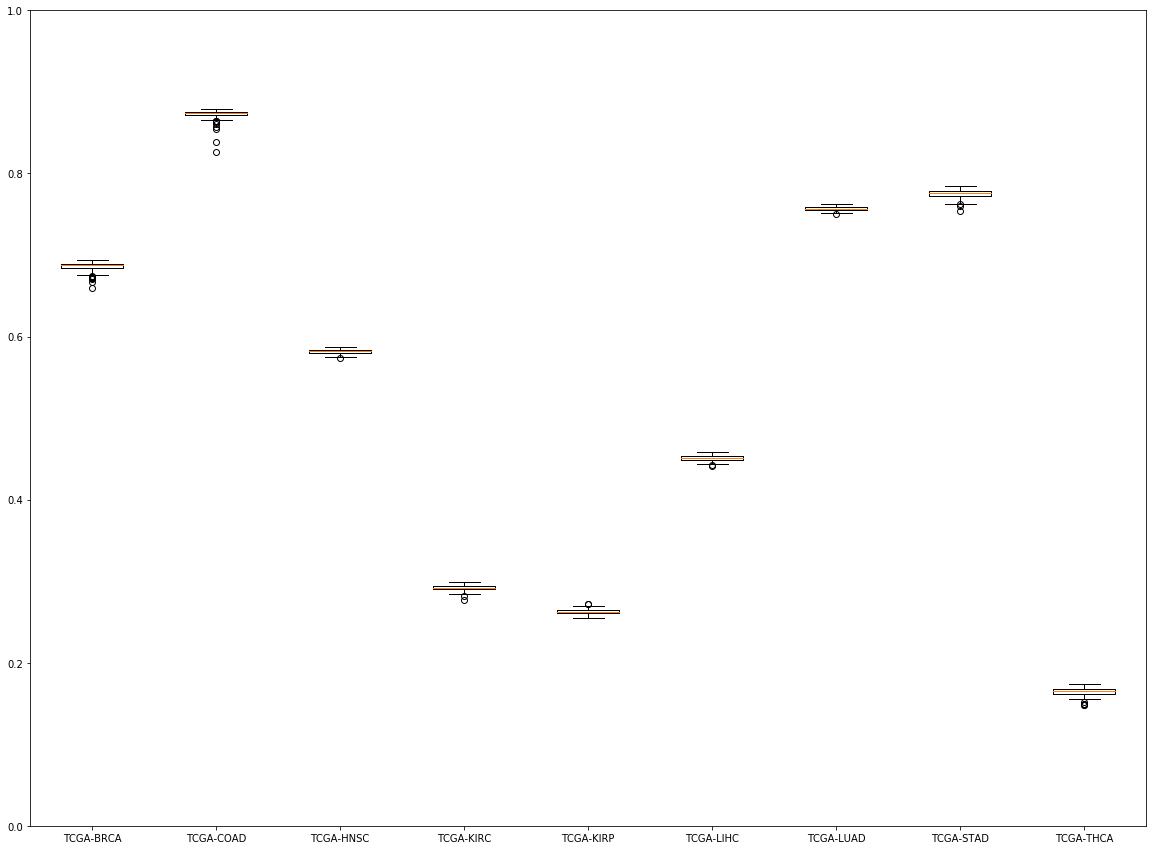

In [14]:
import collections
od = collections.OrderedDict(sorted(d_out.items()))

fig, ax = plt.subplots(figsize= (20,15))
ax.boxplot(od.values())
ax.set_xticklabels(od.keys())
ax.set_ylim(0,1)
from io import BytesIO
png1 = BytesIO()
fig.savefig(png1, format='png')
#plt.savefig("pic3",quality = 95)
png2 = Image.open(png1)
png2.save('boxplot_genes.tiff')
png1.close()


In [16]:
f = open("gene_consistency_level.txt","r")
raw = f.read()
f.close()

In [17]:
d_out = ast.literal_eval(raw)

In [17]:
df_1 = pd.read_csv("pathway_consistency(1).csv")

In [18]:
df_1.head()

,Project,Iteration,ConsistentRate
0,TCGA-BRCA,0,0.651527
1,TCGA-BRCA,1,0.652889
2,TCGA-BRCA,2,0.644403
3,TCGA-BRCA,3,0.622649
4,TCGA-BRCA,4,0.642406


In [25]:
out_tmp = []
for r in d_out:
    newline = [r,np.mean(d_out[r]),np.mean(df_1.loc[df_1['Project']== r]['ConsistentRate'].values)]
    out_tmp.append(newline)

In [27]:
pd.DataFrame(out_tmp,columns = ['Project','GeneConsistency','PathwayConsistency']).to_csv("consistency_result1.csv")

TCGA-KIRP


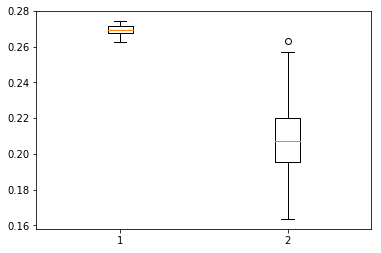

TCGA-HNSC


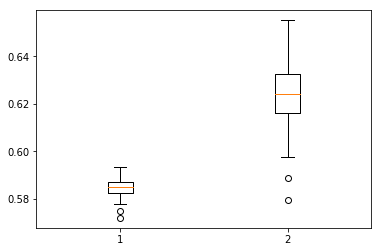

TCGA-KIRC


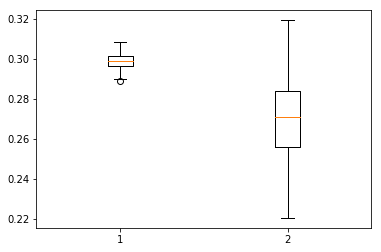

TCGA-COAD


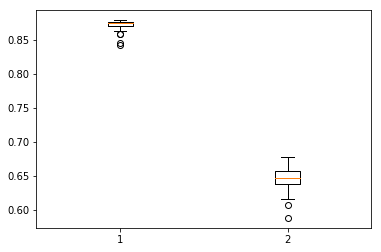

TCGA-LUAD


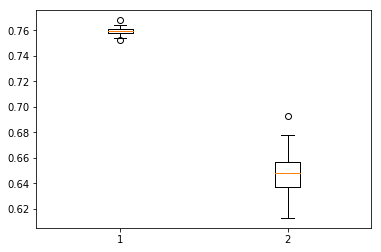

TCGA-STAD


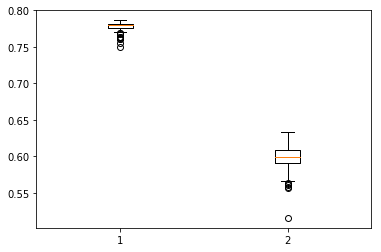

TCGA-THCA


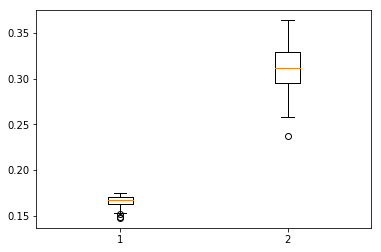

TCGA-LIHC


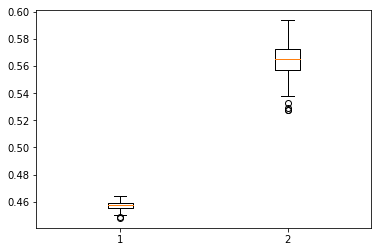

TCGA-BRCA


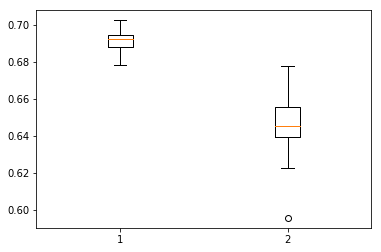

In [19]:
for r in d_out:
    print(r)
    p = [d_out[r],df_1.loc[df_1['Project']== r]['ConsistentRate'].values]
    plt.boxplot(p)
   # plt.boxplot( )
    plt.show()

In [39]:
l1,l2 = [],[]
for g in brca_sym:
    g1 = df_data.loc[df_data['SampleID'].isin(s1)].loc[df_data['Symbol'] == g].shape[0]
    g2 = df_data.loc[df_data['SampleID'].isin(s2)].loc[df_data['Symbol'] == g].shape[0]
    l1.append(g1)
    l2.append(g2)

In [9]:
seed,cancer = 99,"TCGA-KIRP"
random.seed(seed)
s = d[cancer]
random.shuffle(s)
s1, s2 = s[:int(len(s)/2)],s[int(len(s)/2):]
data = df_data.loc[df_data['SampleID'].isin(s)]
A = data.loc[data['SampleID'].isin(s1)]
B = data.loc[data['SampleID'].isin(s2)]


In [18]:
A.loc[A['Symbol'] == "MET"].shape[0]

12

In [19]:
B.loc[B['Symbol'] == "MET"].shape[0]

8

In [20]:
A.loc[A['Symbol'] == "TP53"].shape[0]

1

In [21]:
B.loc[B['Symbol'] == "TP53"].shape[0]

3